<a href="https://colab.research.google.com/github/leticiasdd/Projeto-Aplicado-I/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv('world_population_data.csv')

# Exibindo as primeiras linhas do dataset
print(df.head())

# Nova seção

In [6]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir gráficos
%matplotlib inline

# Verificar o número de linhas e colunas
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas")

# Exibir a estrutura dos dados
df.info()

# Resumo estatístico das variáveis numéricas
df.describe()

# Verificar valores ausentes
df.isnull().sum()

O dataset contém 234 linhas e 17 colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  wor

,0
rank,0
cca3,0
country,0
continent,0
2023 population,0
2022 population,0
2020 population,0
2015 population,0
2010 population,0
2000 population,0


In [12]:
# Nome das Colunas da Tabela
print(df.columns)

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')


# Nova seção

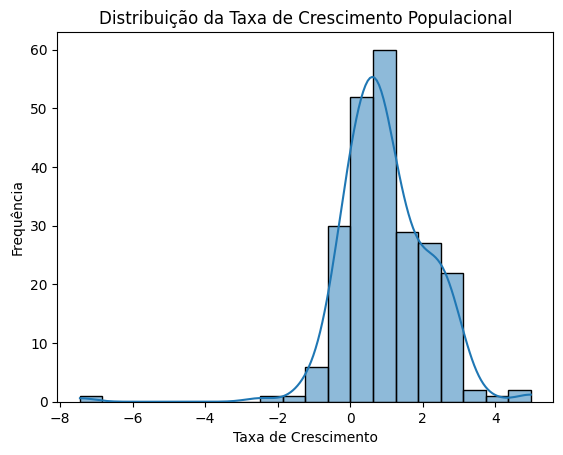

In [27]:
# Histograma da Taxa de Crescimento Populacional
sns.histplot(df['growth rate'], bins=20, kde=True)
plt.title('Distribuição da Taxa de Crescimento Populacional')
plt.xlabel('Taxa de Crescimento')
plt.ylabel('Frequência')
plt.show()

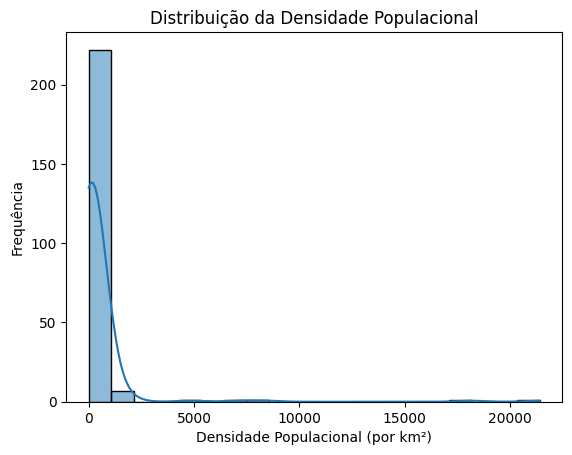

In [20]:
# Histograma da Densidade Populacional
sns.histplot(df['density (km²)'], bins=20, kde=True)
plt.title('Distribuição da Densidade Populacional')
plt.xlabel('Densidade Populacional (por km²)')
plt.ylabel('Frequência')
plt.show()

In [21]:
# Selecionar algumas colunas para comparar as populações de diferentes anos
df[['country', '2023 population', '2022 population', '2020 population', '2015 population']].head()

,country,2023 population,2022 population,2020 population,2015 population
0,India,1428627663,1417173173,1396387127,1322866505
1,China,1425671352,1425887337,1424929781,1393715448
2,United States,339996563,338289857,335942003,324607776
3,Indonesia,277534122,275501339,271857970,259091970
4,Pakistan,240485658,235824862,227196741,210969298


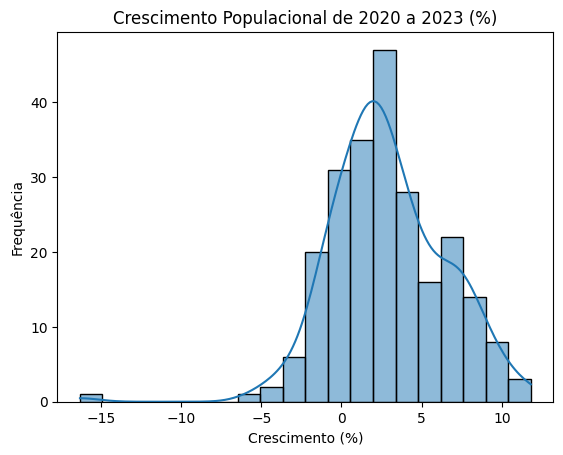

In [22]:
# Criar uma nova coluna para o crescimento populacional de 2020 a 2023
df['growth 2020-2023'] = ((df['2023 population'] - df['2020 population']) / df['2020 population']) * 100

# Visualizar o crescimento populacional de 2020 a 2023
sns.histplot(df['growth 2020-2023'], bins=20, kde=True)
plt.title('Crescimento Populacional de 2020 a 2023 (%)')
plt.xlabel('Crescimento (%)')
plt.ylabel('Frequência')
plt.show()

In [33]:
# Converter os valores de frações para porcentagens, se necessário
df['growth rate'] = df['growth rate'] * 100

In [30]:
# Verificar o tipo de dados na coluna 'growth rate'
print(df['growth rate'].dtype)

float64


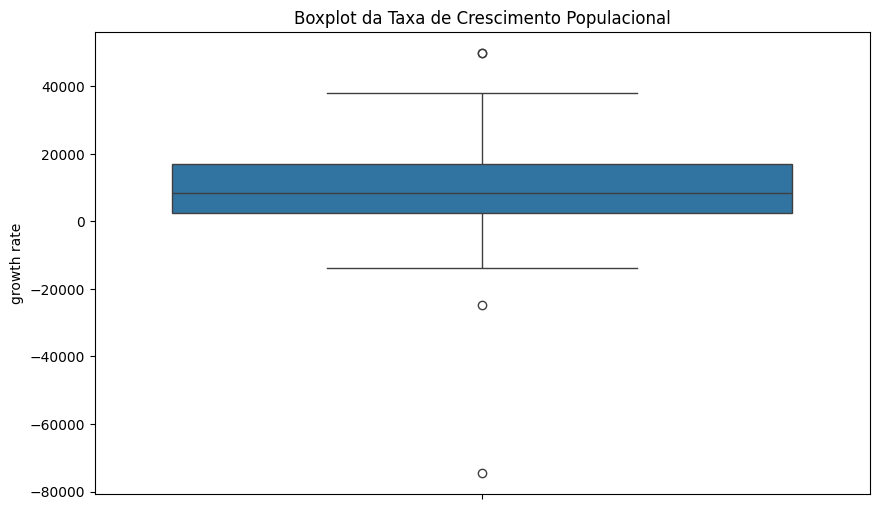

In [43]:
# Boxplot para verificar outliers na Taxa de Crescimento Populacional
plt.figure(figsize=(10,6))
sns.boxplot(y='growth rate', data=df)
plt.title('Boxplot da Taxa de Crescimento Populacional')
plt.show()

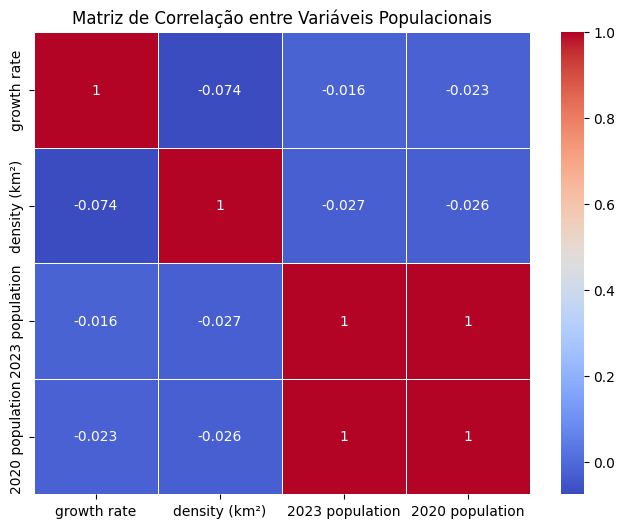

In [35]:
# Matriz de correlação entre variáveis numéricas
correlacao = df[['growth rate', 'density (km²)', '2023 population', '2020 population']].corr()

# Visualizar o heatmap da correlação
plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Populacionais')
plt.show()

In [44]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

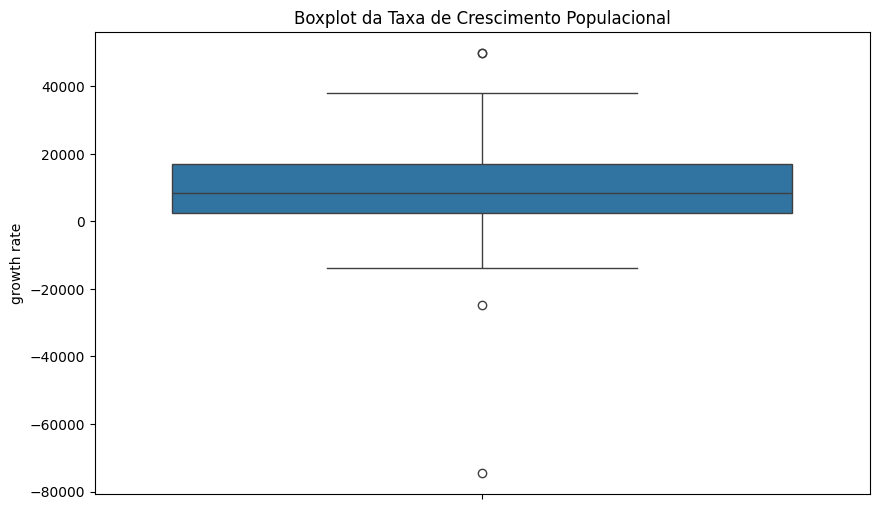

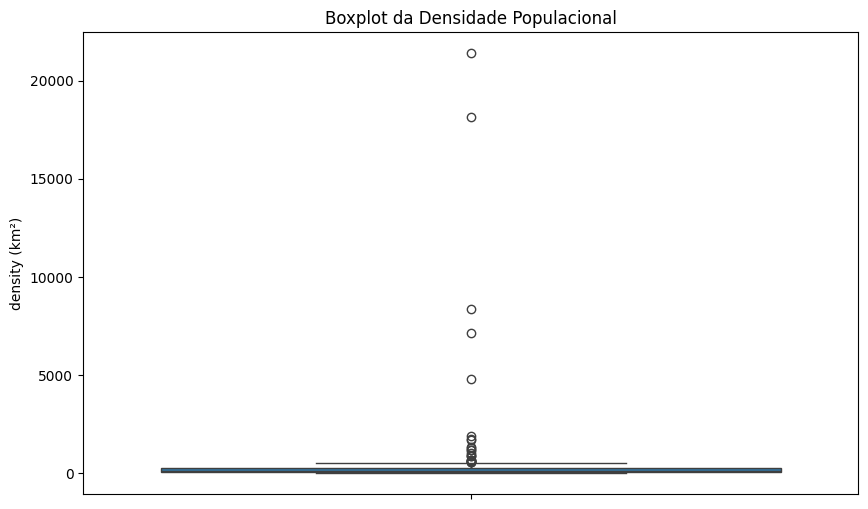

In [45]:
# Boxplot para verificar outliers na Taxa de Crescimento Populacional
plt.figure(figsize=(10,6))
sns.boxplot(y='growth rate', data=df)
plt.title('Boxplot da Taxa de Crescimento Populacional')
plt.show()

# Boxplot para verificar outliers na Densidade Populacional
plt.figure(figsize=(10,6))
sns.boxplot(y='density (km²)', data=df)
plt.title('Boxplot da Densidade Populacional')
plt.show()